In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('data.csv.txt')
df

,km,price
0,240000,3650
1,139800,3800
2,150500,4400
3,185530,4450
4,176000,5250
5,114800,5350
6,166800,5800
7,89000,5990
8,144500,5999
9,84000,6200


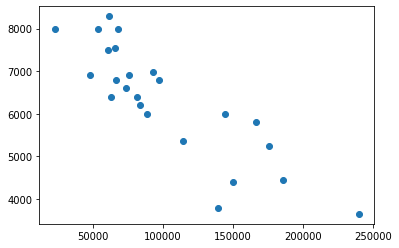

In [3]:
################   SIMPLE PLOT OF DATA #######################
plt.plot(df.km,df.price,'o')
plt.show()

In [4]:
################   LINEAR REGRESSION WITH LEAST SQUARES #######################

sumx = df.km.sum()
N = df.price.count()
xy = 0
sumy = df.price.sum()
for f in range(N) :
    xy+= df['price'][f]* df['km'][f]
xs = 0
for n in range(N):
    xs+= df['km'][n]**2
sxs = sumx**2
m = (N*xy - sumx*sumy)/(N*xs - sxs)
b = (sumy - sumx*m)/N

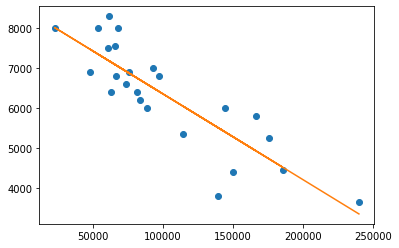

In [5]:
plt.plot(df.km,df.price,'o')
plt.plot(df.km,df.km*m + b)
plt.show()

In [6]:
################   LINEAR REGRESSION WITH STOCHASTIC GRADIENT DESCENT #######################

lr = 0.1
bmax = df.price.max()
amax = df.km.max()
x = df.km.apply(lambda a: a / amax)
y = df.price.apply(lambda f: f / bmax)
epoch = 1000
dm = 0
db = 0
for i in range(epoch):
    for j in range(df.km.count()):
        guess = dm*x[j] + db
        error = y[j] - guess
        dm += x[j] * error * lr
        db += error * lr
m = dm * bmax / amax ### renormalise data 
b = db * bmax

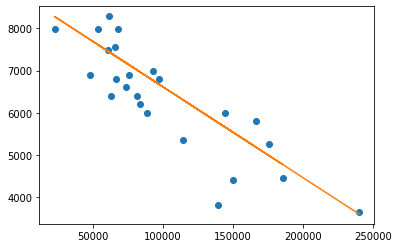

In [7]:
plt.plot(df.km, df.price, 'o')
plt.plot(df.km, df.km * m + b)
plt.show()

In [8]:
################   LINEAR REGRESSION WITH BATCH GRADIENT DESCENT #######################

m = 0
b = 0
lr = 0.1
bmax = df.price.max()
amax = df.km.max()
x = df.km.apply(lambda a: a / amax)
y = df.price.apply(lambda f: f / bmax)
epoch = 1000
for i in range(epoch):
    dm = 0
    db = 0
    for j in range(df.km.count()):
        guess = m*x[j] + b
        error = y[j] - guess
        dm += x[j] * error * lr
        db += error * lr
    m += 1/df.km.count() * dm #### mean of dm ####
    b += 1/df.km.count() * db
m *= bmax / amax ### renormalise data 
b *= bmax

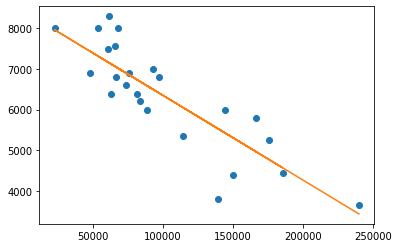

In [9]:
plt.plot(df.km, df.price, 'o')
plt.plot(df.km, df.km * m + b)
plt.show()